<h1 style="text-align:center; font-size:50px; font-weight:bold;">Faces Analysis</h1>

<p style="text-align:center; font-weight:bold; font-size:25px;">
  Project by:  Sahar Pourghasemi
</p>

In [41]:
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from retinaface import RetinaFace
from pathlib import Path

<h3 style="font-size:30px; font-weight:bold;">Part O (Kernels):</h3>
<p style="font-size:15px; margin-left:20px;">
  1.1 Implement the Convolution Function
  <br>
  We will create a function that performs the convolution operation on an image using a given kernel. This function will handle padding, applying the kernel to each pixel, and generating the convolution result.
  <br><br>
  1.2 Test Various Kernels
  <br>
  We will test different kernels to understand their effects on the image:
  <ul>
    <li><strong>Identity Kernel:</strong> This kernel should leave the image unchanged.</li>
    <li><strong>Left Sobel Kernel:</strong> Used for edge detection in the horizontal direction.</li>
    <li><strong>Blur Kernel:</strong> Blurs the image by averaging pixel values.</li>
    <li><strong>Random Kernel:</strong> A randomly generated kernel to observe arbitrary effects.</li>
  </ul>
</p>


<h4 style="font-size:18px; font-weight:bold; margin-left:20px;">1.1 Implement the Convolution Function</h4>
<p style="font-size:15px; margin-left:20px;">
  We will create a function that performs the convolution operation on an image using a given kernel. This function will include:
  <br><br>
  - Padding the image to handle border effects.
  <br>
  - Applying the kernel to each pixel of the image.
  <br>
  - Generating and returning the convolution result.
</p>


In [42]:
def convolution2d(image, kernel):
    
    # Get dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    """
        When performing convolution, the kernel needs to be applied to every pixel of the image, including those near the edges. Without padding, the kernel cannot fully cover the edges of the image, leading to incorrect results or a smaller output size. Padding helps to manage these border effects by adding extra pixels around the edges of the image.
        
        np.pad() is a NumPy function used to add padding to an array. The padding can be added to the beginning or end of each axis (in this case, the rows and columns of the image).
        
        ((pad_height, pad_height), (pad_width, pad_width)): This tuple specifies the amount of padding to add. The first element ((pad_height, pad_height)) refers to padding added to the rows (top and bottom), and the second element ((pad_width, pad_width)) refers to padding added to the columns (left and right).
        
        mode='constant': Specifies that the padding should use a constant value (0 by default) for the added pixels. Other modes include 'edge' (pads with the edge values), 'reflect' (pads with reflection), etc.
    
    """
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image
    output = np.zeros((image_height, image_width))
    
    # Apply convolution
    for i in range(image_height):
        for j in range(image_width):
            # we extract a sub-region from the padded image that is the same size as the kernel
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

<h4 style="font-size:18px; font-weight:bold; margin-left:20px;">1.2 Test Various Kernels</h4>
<p style="font-size:15px; margin-left:20px;">
  We will test different kernels to understand their effects on the image. The kernels to be tested include:
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">Identity Kernel</h4>
<p style="font-size:15px; margin-left:40px;">
  The <strong>Identity Kernel</strong> is used to verify the correctness of the convolution function. This kernel is defined as:
  <br><br>
  <code>
  [[0, 0, 0],<br>
   [0, 1, 0],<br>
   [0, 0, 0]]
  </code>
  <br><br>
  When applied to an image, this kernel should leave the image unchanged because it has no effect on the pixel values except for the central pixel.
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">Testing the Left Sobel Kernel</h4>
<p style="font-size:15px; margin-left:40px;">
  The <strong>Left Sobel Kernel</strong> is used for edge detection in the horizontal direction. This kernel is defined as:
  <br><br>
  <code>
  [[1, 0, -1],<br>
   [2, 0, -2],<br>
   [1, 0, -1]]
  </code>
  <br><br>
  When applied to an image, this kernel highlights vertical edges by calculating the gradient in the horizontal direction. It helps in detecting and emphasizing edges in the image.
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">Testing the Blur Kernel</h4>
<p style="font-size:15px; margin-left:40px;">
  The <strong>Blur Kernel</strong> is used to blur the image by averaging pixel values. This kernel is defined as:
  <br><br>
  <code>
  [[1/36, 1/36, 1/36, 1/36, 1/36, 1/36],<br>
   [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],<br>
   [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],<br>
   [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],<br>
   [1/36, 1/36, 1/36, 1/36, 1/36, 1/36],<br>
   [1/36, 1/36, 1/36, 1/36, 1/36, 1/36]]
  </code>
  <br><br>
  When applied to an image, this kernel smooths out details and reduces noise by averaging the pixel values in the kernel's neighborhood. It effectively blurs the image and makes the details less sharp.
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">Testing the Random Kernel</h4>
<p style="font-size:15px; margin-left:40px;">
  The <strong>Random Kernel</strong> is a randomly generated kernel used to observe arbitrary effects on the image. This kernel is defined as:
  <br><br>
  <code>
  [[a, b, c],<br>
   [d, e, f],<br>
   [g, h, i]]
  </code>
  <br><br>
  Here, <code>a, b, c, d, e, f, g, h, i</code> are random values. When applied to an image, this kernel creates unpredictable effects due to its arbitrary values. It helps in testing how the convolution function handles non-standard inputs.
</p>


<h6 style="font-size:16px; font-weight:bold; margin-left:30px;">Import and Apply Kernels to Dataset Images</h6>
<p style="font-size:15px; margin-left:40px;">
  We will import images from the dataset folder and apply different kernels to each image. The process includes:
  <br><br>
  - <strong>Loading Images:</strong> Import all images from the specified folder.
  <br>
  - <strong>Applying Kernels:</strong> Use the convolution function to apply each kernel to the images.
  <br>
  - <strong>Displaying Results:</strong> Create subplots to visualize the original images and the results of applying each kernel.
</p>



Processing Images: 100%|██████████| 6/6 [05:03<00:00, 50.57s/it] 


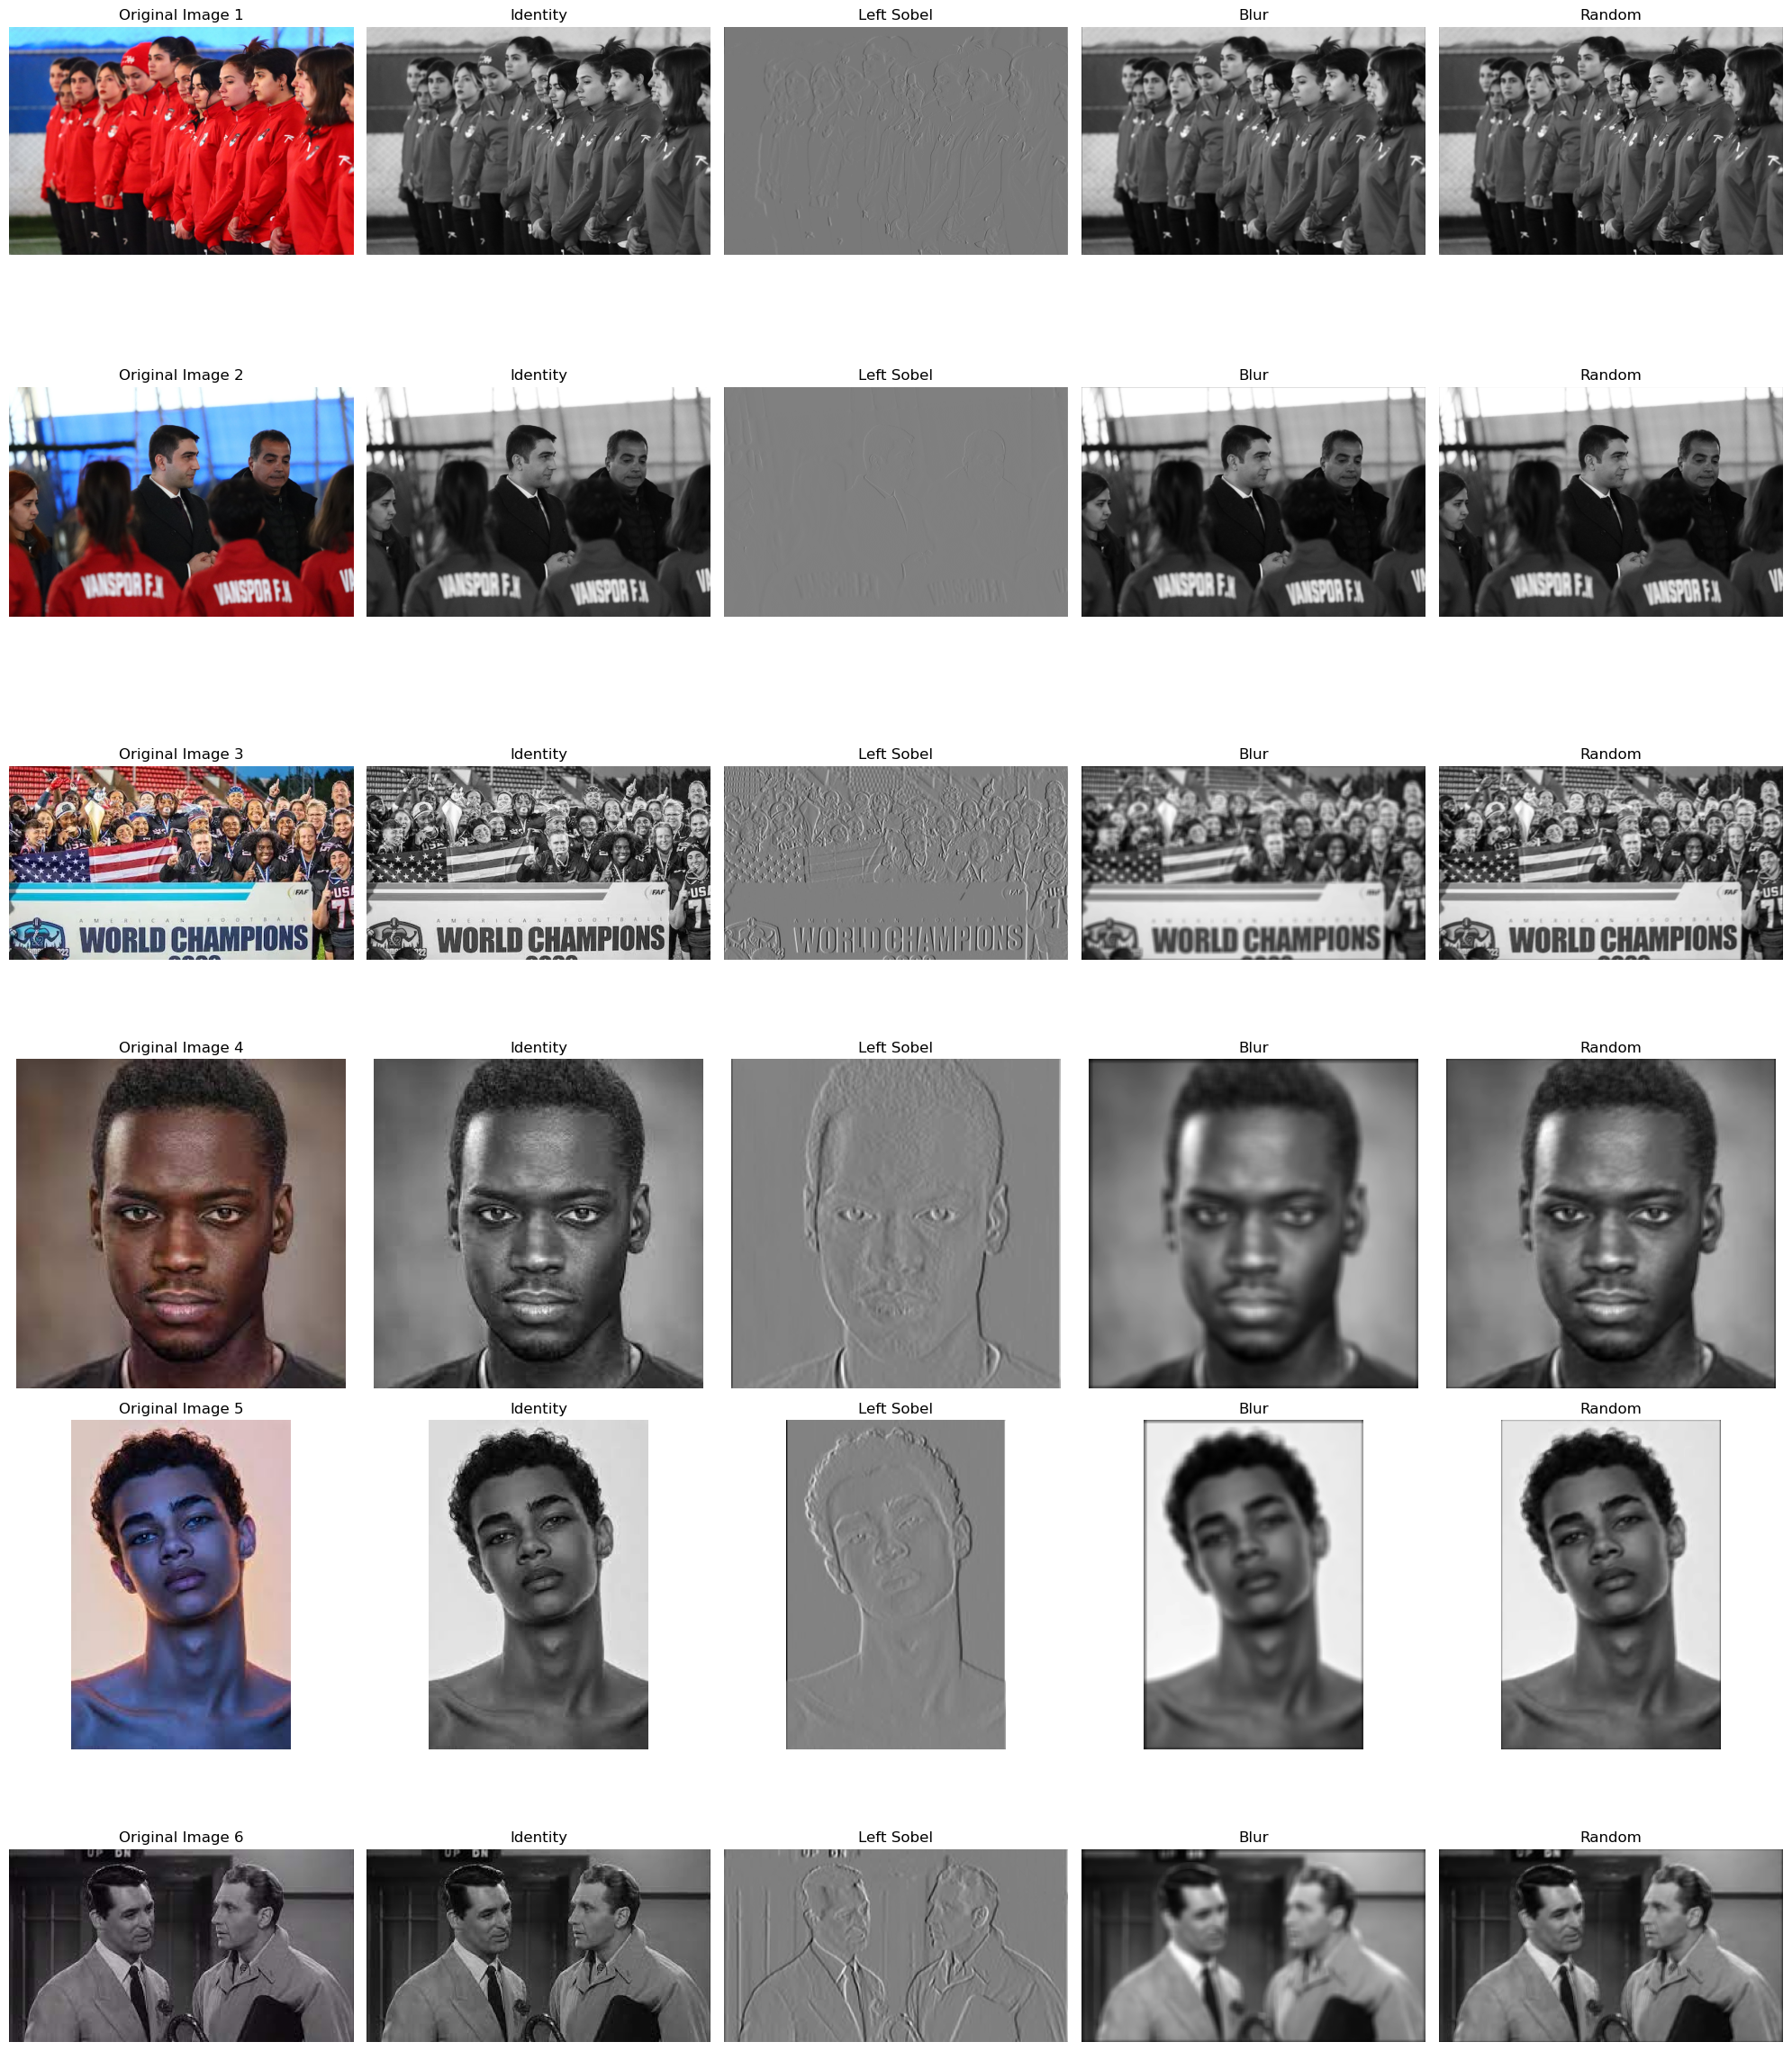

In [43]:

# Define paths and kernels
dataset_path = 'faces'
kernel_names = ['Identity', 'Left Sobel', 'Blur', 'Random']
kernels = {
    'Identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    'Left Sobel': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),  
    'Blur': np.ones((6, 6)) / 36,  
    'Random': np.random.rand(3, 3)
}

# Function to apply all kernels to an image
def apply_kernels(image, kernels):
    results = {}
    for name, kernel in kernels.items():
        results[name] = convolution2d(image, kernel)
    return results

# Load images from the dataset folder
image_files = [f for f in os.listdir(dataset_path)]
images = [cv2.imread(os.path.join(dataset_path, file)) for file in image_files]

# Prepare for plotting
num_images = len(images)
fig, axes = plt.subplots(num_images, len(kernel_names) + 1, figsize=(20, num_images * 4))

for idx, image in tqdm(enumerate(images), total=num_images, desc="Processing Images"):
    # Convert to grayscale for kernels application
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Display the original image
    axes[idx, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Show RGB image
    axes[idx, 0].set_title(f'Original Image {idx+1}')
    axes[idx, 0].axis('off')
    
    # Apply each kernel and display results
    results = apply_kernels(gray_image, kernels)
    for jdx, (kernel_name, result) in enumerate(results.items()):
        axes[idx, jdx + 1].imshow(result, cmap='gray')
        axes[idx, jdx + 1].set_title(f'{kernel_name}')
        axes[idx, jdx + 1].axis('off')

plt.tight_layout()
plt.show()



<h3 style="font-size:30px; font-weight:bold;">Part I (Get to know RetinaFace):</h3>
<p style="font-size:15px; margin-left:20px;">
  In this part, we explore and set up the RetinaFace project for face detection. The steps include:
  <br><br>
  1. Downloading and installing the RetinaFace package.
  <br>

</p>





<h3 style="font-size:30px; font-weight:bold;">Part III (Face Filtering App)</h3>
<p style="font-size:15px; margin-left:20px;">
  In this part of the project, we will develop a face filtering application with the following features:
  <br><br>
  <strong>1. Removing Black and White Images:</strong> Implement a method to identify and remove black and white images from the dataset, keeping only color images.
  <br><br>
  <strong>2. Face Detection Module:</strong> Utilize a face detection library or method to identify faces within the images.
  <br><br>
  <strong>3. Face Feature Extraction Method:</strong> Develop a method to extract features from detected faces. These features will help determine if a face is in a front pose.
  <br><br>
  <strong>4. Decision Function:</strong> Create a boolean function that returns true if the face is in a front pose based on the extracted features.
  <br><br>
  <strong>5. Filtering Function:</strong> Implement a function that inputs a directory, extracts all front-posed faces from images, and saves them into another directory.
</p>


<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">1. Removing Black and White Images</h4>
<p style="font-size:15px; margin-left:40px;">
  This step involves implementing a method to identify and remove black and white images from the dataset. The key steps are:
  <ul style="margin-left:50px;">
    <li>Load each image from the dataset directory.</li>
    <li>Check if the image is black and white (grayscale).</li>
    <li>Remove grayscale images and move color images to a new directory.</li>
  </ul>
</p>


In [44]:
# Add the src directory to the Python path
sys.path.insert(0, os.path.abspath('src'))

# Import the function from the image_filter.py file
from black_white import remove_black_and_white_images

# Define paths
dataset_path = 'faces'  # Path to your images
output_path = 'color_images'  # Where the color images will be saved

# Call the function
remove_black_and_white_images(dataset_path, output_path)


Copying color image: 1.jpg to color_images folder
Copying color image: 2.jpg to color_images folder
Copying color image: 3.webp to color_images folder
Copying color image: 4.jpeg to color_images folder
Copying color image: 5.jpeg to color_images folder
Skipping grayscale image: 6.jpeg


<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">2. Face Detection Module</h4>
<p style="font-size:15px; margin-left:40px;">
  In this step, we implement a face detection module using the RetinaFace model. The process involves:
  <ul style="margin-left:50px;">
    <li>Initializing the RetinaFace model for detecting faces.</li>
    <li>Loading each image from the dataset directory.</li>
    <li>Using the face detection model to identify faces in the images.</li>
    <li>Copying images that contain detected faces to a new directory.</li>
  </ul>
</p>


In [45]:
from src.faces_detected import FaceDetectorRetinaFace, process_images_and_save

# Define paths
dataset_path = 'faces'
output_path = 'crop_faces_detected'

# Create an instance of the FaceDetectorRetinaFace class
face_detector = FaceDetectorRetinaFace()

# Process images and save cropped faces
process_images_and_save(dataset_path, output_path, face_detector)


Saved cropped face to crop_faces_detected\1_face_0.jpg
Saved cropped face to crop_faces_detected\1_face_1.jpg
Saved cropped face to crop_faces_detected\1_face_2.jpg
Saved cropped face to crop_faces_detected\1_face_3.jpg
Saved cropped face to crop_faces_detected\1_face_4.jpg
Saved cropped face to crop_faces_detected\1_face_5.jpg
Saved cropped face to crop_faces_detected\1_face_6.jpg
Saved cropped face to crop_faces_detected\1_face_7.jpg
Saved cropped face to crop_faces_detected\1_face_8.jpg
Saved cropped face to crop_faces_detected\1_face_9.jpg
Saved cropped face to crop_faces_detected\1_face_10.jpg
Saved cropped face to crop_faces_detected\1_face_11.jpg
Saved cropped face to crop_faces_detected\2_face_0.jpg
Saved cropped face to crop_faces_detected\2_face_1.jpg
Saved cropped face to crop_faces_detected\2_face_2.jpg
Saved cropped face to crop_faces_detected\3_face_0.jpg
Saved cropped face to crop_faces_detected\3_face_1.jpg
Saved cropped face to crop_faces_detected\3_face_2.jpg
Saved cr

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">3. Face Feature Extraction Method</h4>
<p style="font-size:15px; margin-left:40px;">
  The Face Feature Extraction Method involves identifying and extracting key facial landmarks from images. This is achieved using a facial landmark detection library such as MediaPipe. The extracted features include:
  <ul style="margin-left:50px;">
    <li>Right eye position</li>
    <li>Left eye position</li>
    <li>Nose position</li>
    <li>Mouth corners</li>
  </ul>
  These landmarks help in analyzing the face orientation and are crucial for determining whether the face is in a frontal pose.
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">4. Decision Function</h4>
<p style="font-size:15px; margin-left:40px;">
  The Decision Function evaluates if a face is in a frontal pose based on the extracted facial landmarks. This function performs the following steps:
  <ul style="margin-left:50px;">
    <li>Calculate distances between key facial landmarks such as the eyes, nose, and mouth.</li>
    <li>Check for symmetry in these distances to determine if the face is oriented frontally.</li>
    <li>Return a boolean value indicating whether the face is in a frontal pose or not.</li>
  </ul>
  This function helps in distinguishing frontal faces from other orientations, which is essential for filtering and processing face images.
</p>

<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">5. Filtering Function</h4>
<p style="font-size:15px; margin-left:40px;">
  The Filtering Function processes a directory of images to identify and extract all faces that are determined to be frontal. The steps involved are:
  <ul style="margin-left:50px;">
    <li>Read each image from the specified directory.</li>
    <li>Detect faces and extract facial landmarks using the previously defined methods.</li>
    <li>Apply the decision function to determine if the detected faces are frontal.</li>
    <li>Save each detected frontal face to a new directory for further use or analysis.</li>
  </ul>
  This function automates the extraction of frontal faces from a dataset and stores them in a designated folder, facilitating organized data management and further processing.
</p>


In [46]:
from src.front_Filtering import FaceFeatureExtractor, PoseClassifier, process_and_filter_faces

# Define paths
input_dir = 'crop_faces_detected'
output_dir = 'front_faces'

# Create instances of the feature extractor and pose classifier
feature_extractor = FaceFeatureExtractor()
pose_classifier = PoseClassifier(threshold=0.1)  # Adjust threshold as needed

# Process images and filter frontal faces
process_and_filter_faces(input_dir, output_dir, feature_extractor, pose_classifier)


No landmarks detected in 1_face_11.jpg, skipping.
No landmarks detected in 1_face_9.jpg, skipping.
Saved cropped frontal face to front_faces\3_face_10_frontal_face_0.jpg
Saved cropped frontal face to front_faces\3_face_12_frontal_face_0.jpg
No landmarks detected in 3_face_14.jpg, skipping.
Saved cropped frontal face to front_faces\3_face_15_frontal_face_0.jpg
No landmarks detected in 3_face_16.jpg, skipping.
Saved cropped frontal face to front_faces\3_face_19_frontal_face_0.jpg
Saved cropped frontal face to front_faces\3_face_2_frontal_face_0.jpg
Saved cropped frontal face to front_faces\3_face_20_frontal_face_0.jpg
No landmarks detected in 3_face_21.jpg, skipping.
No landmarks detected in 3_face_22.jpg, skipping.
Saved cropped frontal face to front_faces\3_face_23_frontal_face_0.jpg
No landmarks detected in 3_face_25.jpg, skipping.
Saved cropped frontal face to front_faces\3_face_6_frontal_face_0.jpg
Saved cropped frontal face to front_faces\3_face_7_frontal_face_0.jpg
Saved cropped f

<h4 style="font-size:30px; font-weight:bold; ">Conclusion</h4>
<p style="font-size:15px; margin-left:20px;">
  The project involves processing a dataset of 20 images to identify and extract front-facing faces. A front-facing face is defined as a face image taken from the front without any angle. The project is divided into multiple parts, each focusing on different aspects of image processing and analysis:
</p>
<h4 style="font-size:16px; font-weight:bold; margin-left:20px;">1. Kernel Implementation (Part O)</h4>
<p style="font-size:15px; margin-left:30px;">
  This part involves implementing a convolution function from scratch. The function takes an image and a kernel as inputs and outputs the convolution product. Various kernels tested include:
  <ul style="margin-left:40px;">
    <li><strong>Identity:</strong> Preserves the original image.</li>
    <li><strong>Left Sobel:</strong> Detects edges in the horizontal direction.</li>
    <li><strong>Blur:</strong> Applies a blur effect to smooth the image.</li>
    <li><strong>Random Kernel:</strong> A kernel with random values to test different effects.</li>
  </ul>
</p>
<h4 style="font-size:16px; font-weight:bold; margin-left:20px;">2. Face Analysis with RetinaFace (Part I)</h4>
<p style="font-size:15px; margin-left:30px;">
  In this phase, the project requires setting up and familiarizing with the RetinaFace library. RetinaFace is used for detecting faces in images. The initial setup involves:
  <ul style="margin-left:40px;">
    <li>Installing RetinaFace.</li>
    <li>Understanding its functionality for face detection.</li>
  </ul>
</p>
<h4 style="font-size:16px; font-weight:bold; margin-left:30px;">3. Implementation of Face Filtering App (Part III)</h4>
<p style="font-size:15px; margin-left:40px;">
  This part includes the core functionalities of the face filtering app. The project requires:
  <ul style="margin-left:50px;">
    <li><strong>Removing Black and White Images:</strong> Identifying and removing grayscale images from the dataset, moving only color images to a new directory.</li>
    <li><strong>Face Detection Module:</strong> Using RetinaFace to detect faces in images. This includes drawing bounding boxes around detected faces and saving these annotated images.</li>
    <li><strong>Face Feature Extraction Method:</strong> Extracting facial landmarks from detected faces using MediaPipe. Features extracted include eye positions, nose, and mouth corners.</li>
    <li><strong>Decision Function:</strong> Implementing a function to determine if a face is frontal based on the extracted landmarks. The function checks for symmetry and specific landmark distances.</li>
    <li><strong>Filtering Function:</strong> Processing a directory of images to extract and save only those faces identified as frontal. This involves reading images, detecting faces, applying the decision function, and saving the cropped frontal faces to a new directory.</li>
  </ul>
</p>
<p style="font-size:15px; margin-left:20px;">
  By following these steps, the project achieves a comprehensive face analysis system that identifies, processes, and filters frontal faces from a dataset of images. The resulting system ensures that only front-facing faces are extracted and saved for further use.
</p>